# Graph Classification with GNN

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import os
import torch

torch.cuda.is_available()

from torch_geometric.datasets import TUDataset

In [6]:
dataset = TUDataset(root="./dataset/TUDataset", name = 'MUTAG')

Processing...
Done!


In [13]:
dataset
len(dataset)
dataset.num_node_features
dataset.num_edge_features
dataset.num_classes

MUTAG(188)

188

7

4

2

In [15]:
sample_data1 = dataset[0]

In [22]:
sample_data1
sample_data1.num_nodes
sample_data1.num_edge_features
sample_data1.num_edge_types
sample_data1.edge_index

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])

17

4

1

tensor([[ 0,  0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,
          8,  8,  8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14,
         15, 16],
        [ 1,  5,  0,  2,  1,  3,  2,  4,  9,  3,  5,  6,  0,  4,  4,  7,  6,  8,
          7,  9, 13,  3,  8, 10,  9, 11, 10, 12, 11, 13, 14,  8, 12, 12, 15, 16,
         14, 14]])

In [25]:
sample_data2 = dataset[3]
sample_data2
sample_data2.num_nodes
sample_data2.num_edge_features
sample_data2.num_edge_types
sample_data2.edge_index

Data(edge_index=[2, 44], x=[19, 7], edge_attr=[44, 4], y=[1])

19

4

1

tensor([[ 0,  0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  6,  6,  6,  7,
          7,  8,  8,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14,
         14, 15, 15, 16, 16, 16, 17, 18],
        [ 1,  5,  0,  2,  1,  3,  2,  4, 12,  3,  5,  6,  0,  4,  4,  7, 11,  6,
          8,  7,  9,  8, 10,  9, 11, 15,  6, 10, 12,  3, 11, 13, 12, 14, 16, 13,
         15, 10, 14, 13, 17, 18, 16, 16]])

In [29]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

<Figure size 200x200 with 0 Axes>

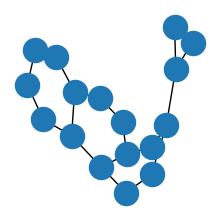

In [32]:
g = to_networkx(sample_data1, to_undirected=True)
plt.figure(figsize=(2,2))
nx.draw(g)

<Figure size 200x200 with 0 Axes>

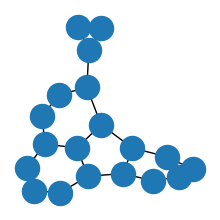

In [33]:
g = to_networkx(sample_data2, to_undirected=True)
plt.figure(figsize=(2,2))
nx.draw(g)

In [35]:
torch.manual_seed(12345)
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

In [36]:
len(train_dataset)
len(test_dataset)

150

38

### Mini Batching

In [39]:
from torch_geometric.loader import DataLoader

In [40]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [41]:
sample_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

In [42]:
for step, batch in enumerate(sample_loader):
    print(f"num of graphs in batch :: {batch.num_graphs}")
    break


num of graphs in batch :: 2


In [44]:
batch
batch[0]
batch[1]

DataBatch(edge_index=[2, 96], x=[42, 7], edge_attr=[96, 4], y=[2], batch=[42], ptr=[3])

Data(edge_index=[2, 50], x=[22, 7], edge_attr=[50, 4], y=[1])

Data(edge_index=[2, 46], x=[20, 7], edge_attr=[46, 4], y=[1])

In [52]:
batch['batch']

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
batch['edge_index'][0]
batch['edge_index'][1]
batch[0]['edge_index']
batch[1]['edge_index']

tensor([ 0,  0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  6,  6,  6,  7,
         7,  8,  8,  8,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 14,
        14, 14, 15, 15, 16, 16, 16, 17, 18, 19, 19, 19, 20, 21, 22, 22, 23, 23,
        24, 24, 24, 25, 25, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30, 30, 30, 31,
        31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 36, 36, 37, 37, 37,
        38, 39, 39, 39, 40, 41])

tensor([ 1,  5,  0,  2,  1,  3,  2,  4, 12,  3,  5,  6,  0,  4,  4,  7, 11,  6,
         8,  7,  9, 19,  8, 10,  9, 11, 15,  6, 10, 12,  3, 11, 13, 12, 14, 13,
        15, 16, 10, 14, 14, 17, 18, 16, 16,  8, 20, 21, 19, 19, 23, 35, 22, 24,
        23, 25, 33, 24, 26, 25, 27, 26, 28, 32, 27, 29, 28, 30, 29, 31, 39, 30,
        32, 37, 27, 31, 33, 24, 32, 34, 33, 35, 36, 22, 34, 34, 37, 31, 36, 38,
        37, 30, 40, 41, 39, 39])

tensor([[ 0,  0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  6,  6,  6,  7,
          7,  8,  8,  8,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 14,
         14, 14, 15, 15, 16, 16, 16, 17, 18, 19, 19, 19, 20, 21],
        [ 1,  5,  0,  2,  1,  3,  2,  4, 12,  3,  5,  6,  0,  4,  4,  7, 11,  6,
          8,  7,  9, 19,  8, 10,  9, 11, 15,  6, 10, 12,  3, 11, 13, 12, 14, 13,
         15, 16, 10, 14, 14, 17, 18, 16, 16,  8, 20, 21, 19, 19]])

tensor([[ 0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,
          8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 14,
         14, 15, 15, 15, 16, 17, 17, 17, 18, 19],
        [ 1, 13,  0,  2,  1,  3, 11,  2,  4,  3,  5,  4,  6, 10,  5,  7,  6,  8,
          7,  9, 17,  8, 10, 15,  5,  9, 11,  2, 10, 12, 11, 13, 14,  0, 12, 12,
         15,  9, 14, 16, 15,  8, 18, 19, 17, 17]])

### Training a GNN

 1. Embed each node by performing multiple rounds of message passing
 2. Aggregate node embeddings into a unified graph embedding (readout layer)
 3. Train a final classifier on the graph embedding

In [54]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv, GATConv, global_mean_pool
import torch.nn.functional as F

In [60]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels=dataset.num_node_features, out_channels=hidden_channels)
        self.conv2 = GCNConv(in_channels=hidden_channels, out_channels=hidden_channels)
        self.conv3 = GCNConv(in_channels=hidden_channels, out_channels=hidden_channels)
        self.lin = Linear(in_features=hidden_channels, out_features=dataset.num_classes)
        
    def forward(self, x, edge_index, batch):
        # 1. obtain embeddings
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)
        
        # 2. Readout Layer
        x = global_mean_pool(x, batch)
        
        # 3. apply classifier
        x = F.dropout(x, p = 0.5, training=self.training)
        x = self.lin(x)
        
        return x

In [65]:
model = GCN(hidden_channels=64)
model

GCN(
  (conv1): GCNConv(7, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)

In [66]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [67]:
def train():
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data['x'], data['edge_index'], data['batch'])
        loss = criterion(out, data['y'])
        loss.backward()
        optimizer.step()

def test(loader):
    model.eval()
    
    correct = 0
    for data in loader:
        out = model(data['x'], data['edge_index'], data['batch'])
        pred = out.argmax(dim = 1)
        correct = correct + int((pred == data['y']).sum())
    return correct / len(loader.dataset)

In [68]:
for epoch in range(1,171):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f"epoch = {epoch:03d} :: train_acc = {train_acc:.4f} :: test_acc = {test_acc:.4f}")

epoch = 001 :: train_acc = 0.6467 :: test_acc = 0.7368
epoch = 002 :: train_acc = 0.6467 :: test_acc = 0.7368
epoch = 003 :: train_acc = 0.6467 :: test_acc = 0.7368
epoch = 004 :: train_acc = 0.6467 :: test_acc = 0.7368
epoch = 005 :: train_acc = 0.6533 :: test_acc = 0.7368
epoch = 006 :: train_acc = 0.6467 :: test_acc = 0.7368
epoch = 007 :: train_acc = 0.6600 :: test_acc = 0.7368
epoch = 008 :: train_acc = 0.7267 :: test_acc = 0.7895
epoch = 009 :: train_acc = 0.7200 :: test_acc = 0.7632
epoch = 010 :: train_acc = 0.7200 :: test_acc = 0.7632
epoch = 011 :: train_acc = 0.7133 :: test_acc = 0.7895
epoch = 012 :: train_acc = 0.7133 :: test_acc = 0.7895
epoch = 013 :: train_acc = 0.7267 :: test_acc = 0.7632
epoch = 014 :: train_acc = 0.7067 :: test_acc = 0.7895
epoch = 015 :: train_acc = 0.7067 :: test_acc = 0.8158
epoch = 016 :: train_acc = 0.7200 :: test_acc = 0.7895
epoch = 017 :: train_acc = 0.7200 :: test_acc = 0.7895
epoch = 018 :: train_acc = 0.7267 :: test_acc = 0.7895
epoch = 01

Using `GraphConv` instead of `GCNConv` which introduces skip connection to the `GCNConv`

In [69]:
from torch_geometric.nn import GraphConv

In [76]:
class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.GConv1 = GraphConv(in_channels=dataset.num_node_features, out_channels=hidden_channels, aggr='add')
        self.GConv2 = GraphConv(in_channels=hidden_channels, out_channels=hidden_channels, aggr='add')
        self.GConv3 = GraphConv(in_channels=hidden_channels, out_channels=hidden_channels, aggr='add')
        self.lin = Linear(in_features=hidden_channels, out_features=dataset.num_classes)
        
    def forward(self, x, edge_index, batch):
        # 1. calculate graph embeddings
        x = self.GConv1(x, edge_index)
        x = x.relu()
        x = self.GConv2(x, edge_index)
        x = x.relu()
        x = self.GConv3(x, edge_index)
        
        # 2. obtain the Readout Layer
        x = global_mean_pool(x, batch)
        
        # 3. apply classifier
        x = F.dropout(x, p = 0.5, training=self.training)
        x = self.lin(x)
        
        return x

In [77]:
model = GNN(hidden_channels=64)
model

GNN(
  (GConv1): GraphConv(7, 64)
  (GConv2): GraphConv(64, 64)
  (GConv3): GraphConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)

In [78]:
optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.01)
criterion = torch.nn.CrossEntropyLoss()

In [79]:
def train():
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data['x'], data['edge_index'], data['batch'])
        loss = criterion(out, data['y'])
        loss.backward()
        optimizer.step()

def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        out = model(data['x'], data['edge_index'], data['batch'])
        pred = out.argmax(dim = 1)
        correct = correct + int((pred == data['y']).sum())
    return correct / len(loader.dataset)

In [80]:
for epoch in range(1,201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f"epoch = {epoch:03d} :: train_acc = {train_acc:.4f} :: test_acc = {test_acc:.4f}")

epoch = 001 :: train_acc = 0.3533 :: test_acc = 0.2632
epoch = 002 :: train_acc = 0.6467 :: test_acc = 0.7368
epoch = 003 :: train_acc = 0.6467 :: test_acc = 0.7368
epoch = 004 :: train_acc = 0.6467 :: test_acc = 0.7368
epoch = 005 :: train_acc = 0.6467 :: test_acc = 0.7368
epoch = 006 :: train_acc = 0.6533 :: test_acc = 0.7368
epoch = 007 :: train_acc = 0.7267 :: test_acc = 0.8158
epoch = 008 :: train_acc = 0.7267 :: test_acc = 0.8158
epoch = 009 :: train_acc = 0.7267 :: test_acc = 0.8158
epoch = 010 :: train_acc = 0.7400 :: test_acc = 0.7895
epoch = 011 :: train_acc = 0.7533 :: test_acc = 0.8158
epoch = 012 :: train_acc = 0.7733 :: test_acc = 0.8421
epoch = 013 :: train_acc = 0.7667 :: test_acc = 0.7895
epoch = 014 :: train_acc = 0.7667 :: test_acc = 0.8158
epoch = 015 :: train_acc = 0.7933 :: test_acc = 0.8684
epoch = 016 :: train_acc = 0.7800 :: test_acc = 0.8158
epoch = 017 :: train_acc = 0.7800 :: test_acc = 0.8421
epoch = 018 :: train_acc = 0.7800 :: test_acc = 0.7895
epoch = 01